# Problem Set 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 1-d Gaussian Random Fields

Consider the random Gaussian field on the 1-d lattice. There are N random variables denoted X=(X1, ..., XN) and we assume X ~ N(0, Sigma) has a multivariate Gaussian distribution. 

a) For this first case, consider the moving average process with covariance matrix Sigma

In [2]:
# First define the covariance matrix
N = 500
cov = np.matrix([[1/10 * max(np.min([i, j, 10 - np.abs(i-j)]), 0) for i in range(1,N+1)] for j in range(1,N+1)])



In [3]:
cov

matrix([[0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
        [0.1, 0.2, 0.2, ..., 0. , 0. , 0. ],
        [0.1, 0.2, 0.3, ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 1. , 0.9, 0.8],
        [0. , 0. , 0. , ..., 0.9, 1. , 0.9],
        [0. , 0. , 0. , ..., 0.8, 0.9, 1. ]])

In [4]:
# Now do the Cholesky decomposition 
A = np.linalg.cholesky(cov)
A_star = A.H

In [5]:
# Verify
A * A.H

matrix([[0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
        [0.1, 0.2, 0.2, ..., 0. , 0. , 0. ],
        [0.1, 0.2, 0.3, ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 1. , 0.9, 0.8],
        [0. , 0. , 0. , ..., 0.9, 1. , 0.9],
        [0. , 0. , 0. , ..., 0.8, 0.9, 1. ]])

In [6]:
# Now set X to be AZ where Z are draws from standard normals
Z = np.random.normal(size = (N,1))
X = np.array(A*Z)

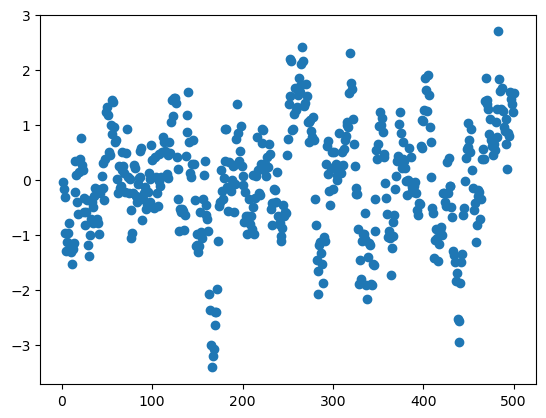

In [7]:
plt.scatter(np.linspace(1, N, N), np.squeeze(X))

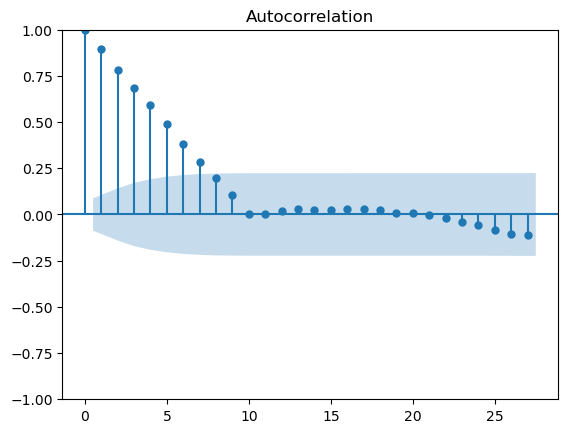

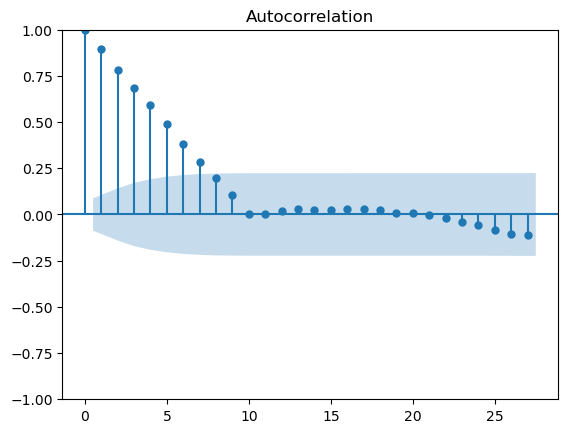

In [8]:
sm.graphics.tsa.plot_acf(X)

b) Now see what happens if we have an autoregressive process with covariance Sigma. Take the square root decomposition of the inverse covariance matrix and scale the linear system. 

In [9]:
# First define the covariance matrix
N = 500
cov = np.matrix([[(9/10)**(np.abs(i-j)) for i in range(1,N+1)] for j in range(1,N+1)])
cov

matrix([[1.00000000e+00, 9.00000000e-01, 8.10000000e-01, ...,
         1.81354022e-23, 1.63218620e-23, 1.46896758e-23],
        [9.00000000e-01, 1.00000000e+00, 9.00000000e-01, ...,
         2.01504469e-23, 1.81354022e-23, 1.63218620e-23],
        [8.10000000e-01, 9.00000000e-01, 1.00000000e+00, ...,
         2.23893854e-23, 2.01504469e-23, 1.81354022e-23],
        ...,
        [1.81354022e-23, 2.01504469e-23, 2.23893854e-23, ...,
         1.00000000e+00, 9.00000000e-01, 8.10000000e-01],
        [1.63218620e-23, 1.81354022e-23, 2.01504469e-23, ...,
         9.00000000e-01, 1.00000000e+00, 9.00000000e-01],
        [1.46896758e-23, 1.63218620e-23, 1.81354022e-23, ...,
         8.10000000e-01, 9.00000000e-01, 1.00000000e+00]])

In [10]:
# Now do the Cholesky decomposition 
B = np.linalg.cholesky(np.linalg.inv(cov))
B_star = B.H

In [11]:
# Now solve the linear system BX = Z where Z are draws from a standard normal
# Z = np.random.normal(size = (N,1))
X = np.linalg.solve(B, Z)

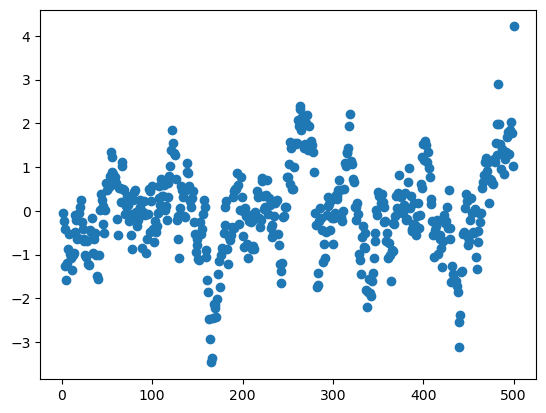

In [12]:
plt.scatter(np.linspace(1, N, N), np.squeeze(X))

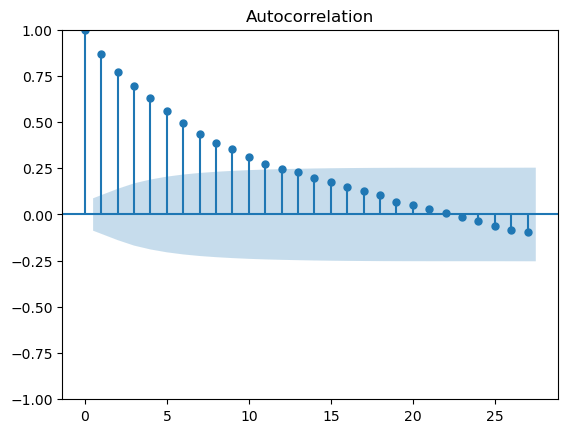

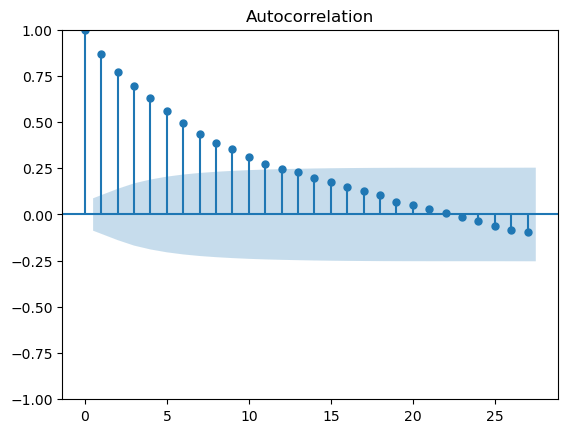

In [13]:
sm.graphics.tsa.plot_acf(X)